## MNIST Handwriting Classification - Neural Network

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

seed = 2022
np.random.seed(seed)
tf.random.set_seed(seed)

In [3]:
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

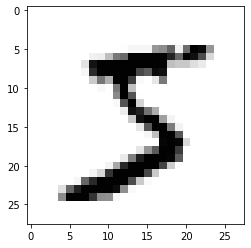

In [4]:
plt.imshow(X_train[0], cmap='Greys');

In [5]:
import sys
for row in X_train[0]:
    for x in row:
        sys.stdout.write(f'{x:3d} ')
    sys.stdout.write('\n')

  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0 
  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0 
  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0 
  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   0   0   0   0   0 

In [6]:
# X_train, X_test 정규화(0 ~ 1)
X_train = X_train / 255.
X_test = X_test / 255.

In [7]:
# 이미지 차원 변경: 2차원 --> 1차원 (train, test 두 방식 모두 가능)
X_train = X_train.reshape(60000, -1)
X_test = X_test.reshape(-1, 784)
X_train.shape, X_test.shape
# 전환 전 = (60000, 28, 28), (10000, 28, 28)

((60000, 784), (10000, 784))

In [8]:
# Y 값 분포
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949],
       dtype=int64))

In [10]:
y_train.shape, y_test.shape

((60000,), (10000,))

In [9]:
# One hot encoding
from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)
Y_train.shape, Y_test.shape

((60000, 10), (10000, 10))

In [14]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

model_1 = Sequential([ 
    Dense(1000, input_dim=784, activation='relu'),
    Dense(256, activation='relu'),
    Dense(48, activation='relu'),
    Dense(10, activation='softmax')
])
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1000)              785000    
                                                                 
 dense_5 (Dense)             (None, 256)               256256    
                                                                 
 dense_6 (Dense)             (None, 48)                12336     
                                                                 
 dense_7 (Dense)             (None, 10)                490       
                                                                 
Total params: 1,054,082
Trainable params: 1,054,082
Non-trainable params: 0
_________________________________________________________________


In [15]:
model_1.compile('adam', 'categorical_crossentropy', ['accuracy'])

In [19]:
mc_1 = ModelCheckpoint('./models/mnist_best_1.h5', verbose=1, save_best_only=True)
es_1 = EarlyStopping(patience=10)
hist_1 = model_1.fit(X_train, Y_train, validation_split=0.2,
                   epochs=100, batch_size=200, verbose=0,
                   callbacks=[mc_1, es_1])


Epoch 00001: val_loss improved from inf to 0.09342, saving model to ./models\mnist_best_1.h5

Epoch 00002: val_loss did not improve from 0.09342

Epoch 00003: val_loss did not improve from 0.09342

Epoch 00004: val_loss did not improve from 0.09342

Epoch 00005: val_loss did not improve from 0.09342

Epoch 00006: val_loss did not improve from 0.09342

Epoch 00007: val_loss did not improve from 0.09342

Epoch 00008: val_loss did not improve from 0.09342

Epoch 00009: val_loss did not improve from 0.09342

Epoch 00010: val_loss did not improve from 0.09342

Epoch 00011: val_loss did not improve from 0.09342


In [20]:
best_model_1 = load_model('./models/mnist_best_1.h5')
best_model_1.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0755 - accuracy: 0.9834


[0.07549247145652771, 0.9833999872207642]

In [21]:
# Add Dropout
model_2 = Sequential([ 
    Dense(1000, input_dim=784, activation='relu'),
    Dropout(0.25),
    Dense(256, activation='relu'),
    Dropout(0.25),
    Dense(48, activation='relu'),
    Dense(10, activation='softmax')
])
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 1000)              785000    
                                                                 
 dropout (Dropout)           (None, 1000)              0         
                                                                 
 dense_9 (Dense)             (None, 256)               256256    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_10 (Dense)            (None, 48)                12336     
                                                                 
 dense_11 (Dense)            (None, 10)                490       
                                                                 
Total params: 1,054,082
Trainable params: 1,054,082
No

In [22]:
model_2.compile('adam', 'categorical_crossentropy', ['accuracy'])

In [23]:
mc_2 = ModelCheckpoint('./models/mnist_best_2.h5', verbose=1, save_best_only=True)
es_2 = EarlyStopping(patience=10)
hist_2 = model_2.fit(X_train, Y_train, validation_split=0.2,
                   epochs=100, batch_size=200, verbose=0,
                   callbacks=[mc_2, es_2])


Epoch 00001: val_loss improved from inf to 0.12418, saving model to ./models\mnist_best_2.h5

Epoch 00002: val_loss improved from 0.12418 to 0.09187, saving model to ./models\mnist_best_2.h5

Epoch 00003: val_loss improved from 0.09187 to 0.08696, saving model to ./models\mnist_best_2.h5

Epoch 00004: val_loss improved from 0.08696 to 0.08599, saving model to ./models\mnist_best_2.h5

Epoch 00005: val_loss improved from 0.08599 to 0.07526, saving model to ./models\mnist_best_2.h5

Epoch 00006: val_loss did not improve from 0.07526

Epoch 00007: val_loss did not improve from 0.07526

Epoch 00008: val_loss did not improve from 0.07526

Epoch 00009: val_loss did not improve from 0.07526

Epoch 00010: val_loss did not improve from 0.07526

Epoch 00011: val_loss did not improve from 0.07526

Epoch 00012: val_loss did not improve from 0.07526

Epoch 00013: val_loss did not improve from 0.07526

Epoch 00014: val_loss did not improve from 0.07526

Epoch 00015: val_loss did not improve from 0.

In [24]:
best_model_2 = load_model('./models/mnist_best_2.h5')
best_model_2.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0688 - accuracy: 0.9800


[0.06876510381698608, 0.9800000190734863]

In [25]:
y_acc_1 = hist_1.history['accuracy']
y_vloss_1 = hist_1.history['val_loss']
xs_1 = np.arange(1, len(y_acc_1)+1)
y_acc_2 = hist_2.history['accuracy']
y_vloss_2 = hist_2.history['val_loss']
xs_2 = np.arange(1, len(y_acc_2)+1)

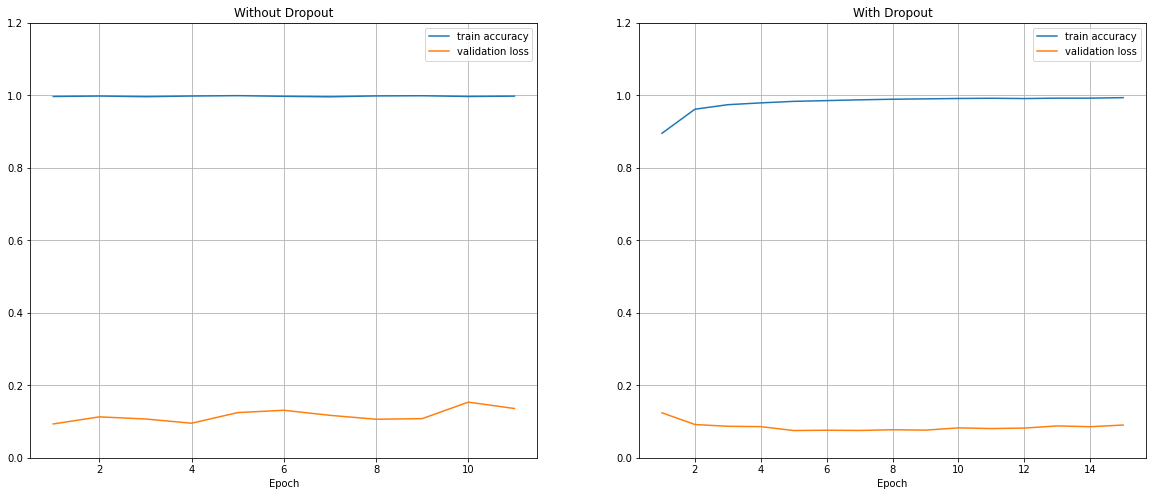

In [26]:
plt.figure(figsize=(20,8))
plt.subplot(121)
plt.plot(xs_1, y_acc_1, label='train accuracy')
plt.plot(xs_1, y_vloss_1, label='validation loss')
plt.legend(), plt.grid()
plt.ylim([0,1.2])
plt.xlabel('Epoch'), plt.title('Without Dropout')

plt.subplot(122)
plt.plot(xs_2, y_acc_2, label='train accuracy')
plt.plot(xs_2, y_vloss_2, label='validation loss')
plt.legend(), plt.grid()
plt.ylim([0,1.2])
plt.xlabel('Epoch'), plt.title('With Dropout')

plt.show()